In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [2]:
df = pd.read_csv('./Stephen Curry Postseason Stats.csv')

In [3]:
df.head()

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,2012-2013,Post,Thu 5/16,SAS,L,82,94,40.0,10-25,10,...,0,0,0.0,4,6,1,1,2,3,22
1,2012-2013,Post,Tue 5/14,SAS,L,91,109,35.0,4-14,4,...,0,0,0.0,0,8,0,1,1,4,9
2,2012-2013,Post,Sun 5/12,SAS,W,97,87,39.0,7-15,7,...,3,3,100.0,6,4,0,0,2,2,22
3,2012-2013,Post,Fri 5/10,SAS,L,92,102,42.0,5-17,5,...,3,3,100.0,2,8,0,2,3,3,16
4,2012-2013,Post,Wed 5/8,SAS,W,100,91,43.0,7-20,7,...,6,9,66.7,4,4,0,1,2,2,22


In [4]:
del_column = ['Season_div','OPP','Result','T Score','O Score','FGM','FGA','FTM','FTA','Date','FG','FT','3PT']
for col in del_column:
    del df[col]

In [5]:
for n in range(len(df)):
    df['Season_year'].iloc[n] = df['Season_year'].iloc[n].split('-')[0]

/var/folders/fg/q9vq8s1s467df4k3plvy57b00000gn/T/ipykernel_73536/3712996983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season_year'].iloc[n] = df['Season_year'].iloc[n].split('-')[0]
/var/folders/fg/q9vq8s1s467df4k3plvy57b00000gn/T/ipykernel_73536/3712996983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season_year'].iloc[n] = df['Season_year'].iloc[n].split('-')[0]
/var/folders/fg/q9vq8s1s467df4k3plvy57b00000gn/T/ipykernel_73536/3712996983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [6]:
df.head()

,Season_year,MIN,FG%,3PTM,3PTA,3P%,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,2012,40.0,40.0,2,8,25.0,0.0,4,6,1,1,2,3,22
1,2012,35.0,28.6,1,7,14.3,0.0,0,8,0,1,1,4,9
2,2012,39.0,46.7,5,10,50.0,100.0,6,4,0,0,2,2,22
3,2012,42.0,29.4,3,9,33.3,100.0,2,8,0,2,3,3,16
4,2012,43.0,35.0,2,6,33.3,66.7,4,4,0,1,2,2,22


In [7]:
grouped_df = df.groupby('Season_year').mean()

In [8]:
grouped_df = grouped_df.round(2)

In [9]:
grouped_df = grouped_df.reset_index()

In [10]:
grouped_df

,Season_year,MIN,FG%,3PTM,3PTA,3P%,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,2012,41.42,42.66,3.50,8.83,38.09,63.89,3.83,8.08,0.17,1.67,2.92,3.33,23.42
1,2013,42.29,44.40,3.14,8.14,37.16,73.97,3.57,8.43,0.14,1.71,2.57,3.71,23.00
2,2014,39.43,45.67,4.67,11.05,43.25,77.47,5.00,6.38,0.14,1.86,2.24,3.90,28.29
3,2015,34.22,43.67,4.44,11.00,40.92,84.20,5.50,5.17,0.28,1.44,2.17,4.17,25.11
4,2016,35.41,48.74,4.24,10.12,41.63,85.65,6.24,6.71,0.24,2.00,2.18,3.41,28.06
5,2017,36.93,45.18,4.27,10.80,37.37,82.00,6.07,5.40,0.73,1.73,2.53,2.87,25.53
6,2018,38.45,44.40,4.18,11.09,38.64,93.15,6.00,5.73,0.18,1.09,3.09,3.00,28.18
7,2021,34.77,45.89,4.14,10.41,39.28,84.39,5.23,5.86,0.36,1.32,2.68,2.59,27.36
8,2022,38.00,47.05,4.38,12.08,37.35,79.29,5.15,6.08,0.46,1.00,2.62,3.23,30.46


In [11]:
df_17 = df[df['Season_year'] == '2017']

In [12]:
df_17 = df_17[(df_17['MIN'] != 0) & (df_17['FG%'] != 0) & (df_17['3P%'] != 0) & (df_17['PTS'] != 0)]

In [13]:
df_17['MIN'] = df_17['MIN'].astype(int)

In [14]:
df_17.head()

,Season_year,MIN,FG%,3PTM,3PTA,3P%,FT%,REB,AST,BLK,STL,PF,TO,PTS
75,2017,39,44.4,7,15,46.7,100.0,6,4,3,3,4,2,37
76,2017,39,18.8,1,10,10.0,100.0,5,6,0,1,3,2,11
77,2017,38,42.3,9,17,52.9,100.0,7,8,0,1,3,5,33
78,2017,46,47.8,5,11,45.5,100.0,6,9,0,1,1,2,29
79,2017,44,45.5,7,15,46.7,0.0,9,10,1,4,4,5,27


In [15]:
len(df_17)

15

In [16]:
group1 = df_17['MIN'].values
group2 = df_17['FG%'].values
group3 = df_17['3P%'].values
group4 = df_17['PTS'].values

groups = [group1, group2, group3, group4]
group_names = ['MIN','FG%','3P%','PTS']
group_colors = ['#ff706d', '#7baf06', '#01bfc5', '#cb7bf6']

In [17]:
img = mpimg.imread('./photo.jpg') 

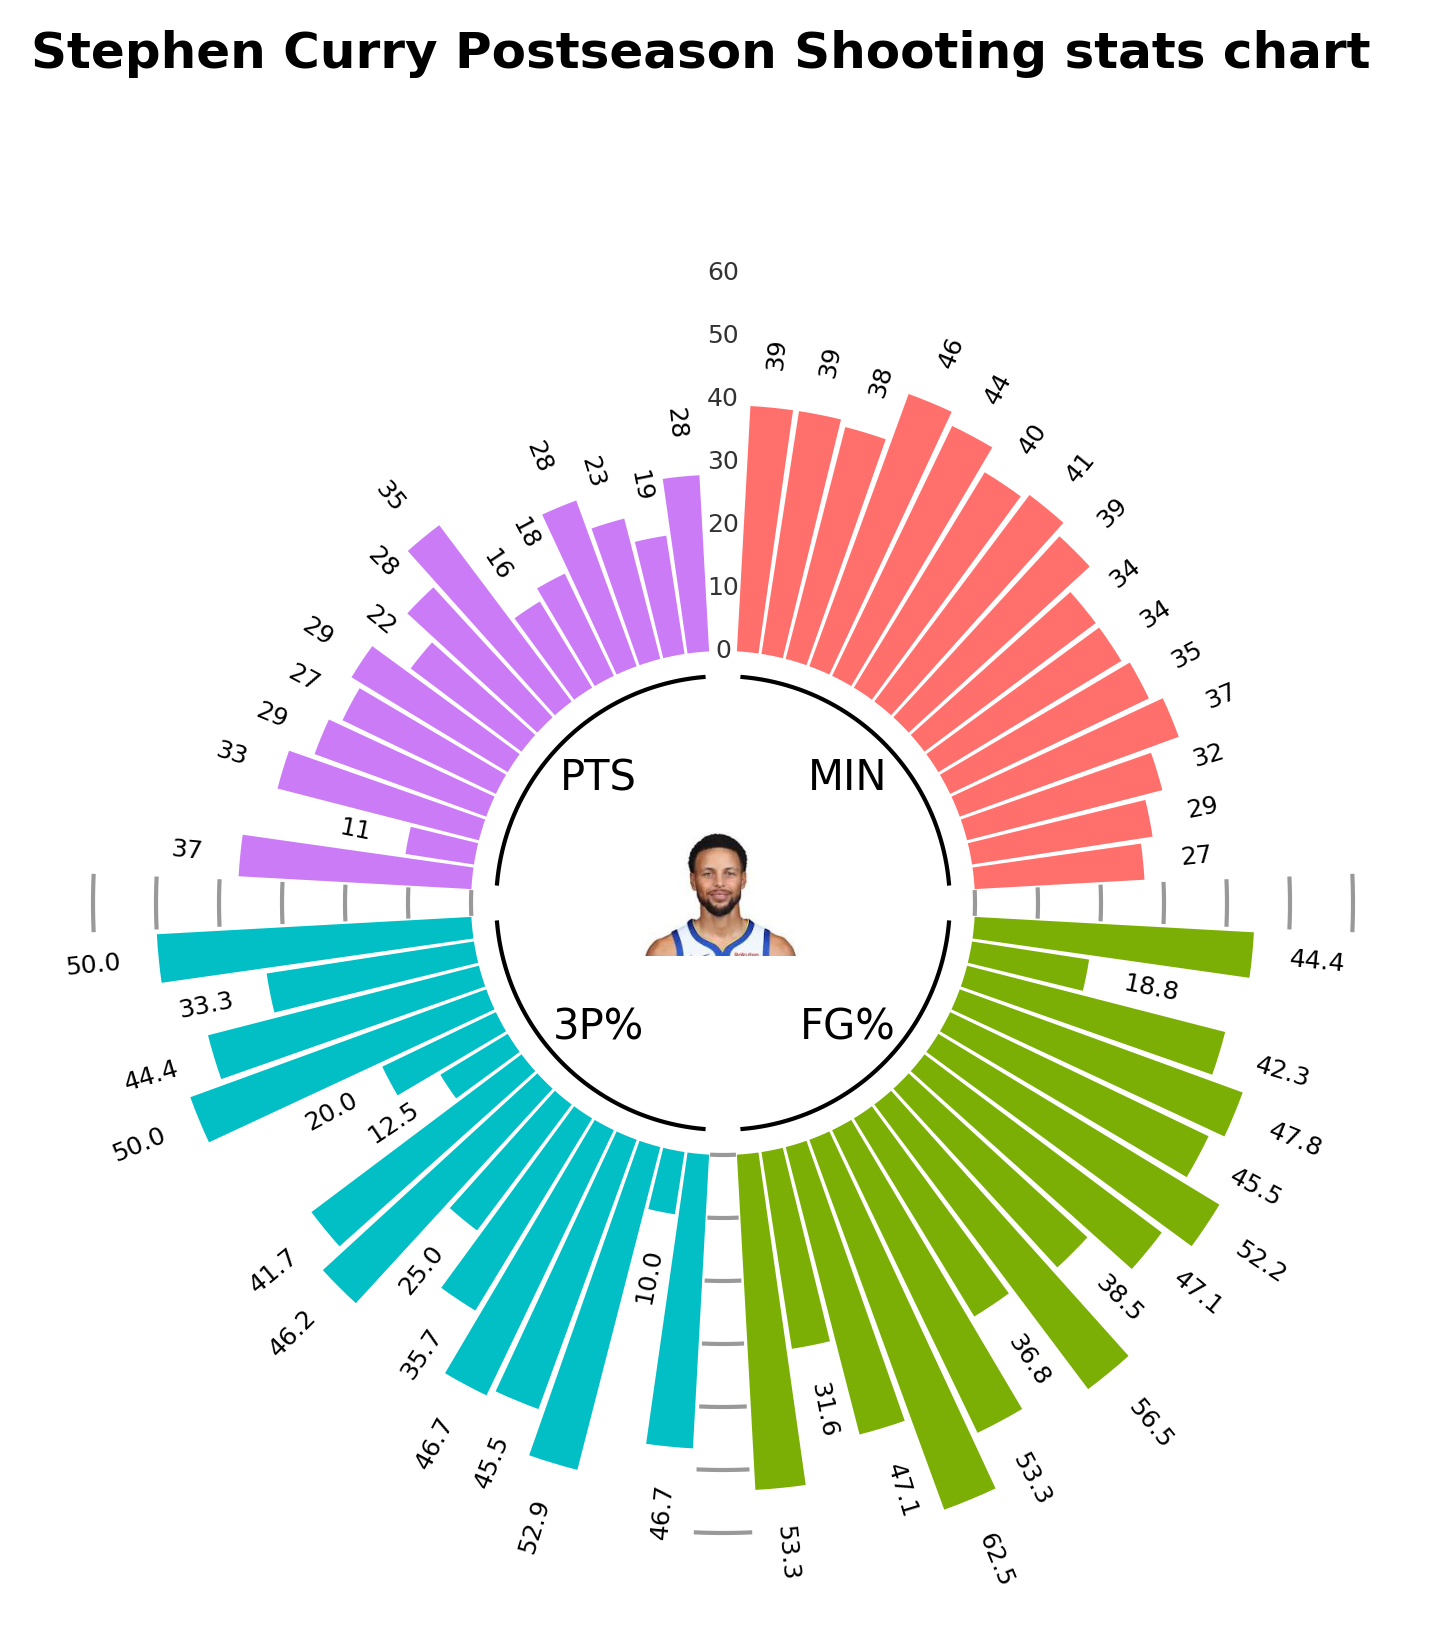

In [18]:
# 画图
fig = plt.figure(figsize=(6, 6), dpi=300, facecolor='white')
ax = fig.add_subplot(projection='polar')

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

radii = [0]
colors = ['white']
for g, c in zip(groups, group_colors):
    radii.extend(g)
    colors.extend([c]*len(g))
    radii.append(0)
    colors.append('white')
radii.pop()
colors.pop()

N = len(radii)
r_lim = 180
scale_lim = 60
scale_major = 10
bottom = 40
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = 2 * np.pi / (N + 9)


# 画出刻度
def scale(ax, bottom, scale_lim, theta, width):
    t = np.linspace(theta-width/2, theta+width/2, 6)
    for i in range(int(bottom), int(bottom+scale_lim+scale_major), scale_major):
        ax.plot(t, [i]*6, linewidth=1, color='gray', alpha=0.8)

# 画出刻度值
def scale_value(ax, bottom, theta, scale_lim):
    for i in range(int(bottom), int(bottom+scale_lim+scale_major), scale_major):
        ax.text(theta,
                i,
                f'{i-bottom}',
                fontsize=6,
                alpha=0.8,
                va='center',
                ha='center'
                )
        
# 画出柱状图
ax.bar(theta, radii, width=width, bottom=bottom, color=colors)

s_list = []
g_no = 1
for t, r in zip(theta, radii):
    if r == 0 :
        s_list.append(t)
        if t == 0:
            scale_value(ax, bottom, t, scale_lim)
        else:
            scale(ax, bottom, scale_lim, t, width)
    else:
        t2 = np.rad2deg(t)
        # 标出每根柱的名称
        ax.text(t, r + bottom + scale_major*0.6,
                f'{r}',
                fontsize=6,
                rotation=90-t2 if t < np.pi else 270-t2,
                rotation_mode='anchor',
                va='center',
                ha='left' if t < np.pi else 'right',
                color='black',
                clip_on=False
                )
        g_no += 1

s_list.append(2 * np.pi)


for i in range(len(s_list)-1):
    t = np.linspace(s_list[i]+width, s_list[i+1]-width, 50)
    ax.plot(t, [bottom-scale_major*0.4]*50, linewidth=1, color='black')
    ax.text(s_list[i]+(s_list[i+1]-s_list[i])/2,
            bottom-scale_major*1.2,
            group_names[i],
            va='center',
            ha='center'
            )
    
fig.suptitle('Stephen Curry Postseason Shooting stats chart', fontsize=12, fontweight='bold')

ax.set_rlim(0, bottom+scale_lim+scale_major)
ax.axis('off')

ax_img = fig.add_axes([0.46, 0.45, 0.1, 0.1]) 
ax_img.imshow(img)
ax_img.axis('off')

fig.savefig('Shooting_stats_chart.png', dpi=300)

plt.show()